In [1]:
%matplotlib inline
import time
#import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pi_estimate.estimator as es
import pi_estimate.pi_series as ps

In [21]:
ex_time = ps.Pi_Series(100,10**6,5)
print ex_time

n=100      3.08          0.0003 seconds
n=1000     3.104         0.0025 seconds
n=10000    3.1404        0.0233 seconds
n=100000   3.1416        0.1848 seconds
n=1000000  3.143932      1.9259 seconds



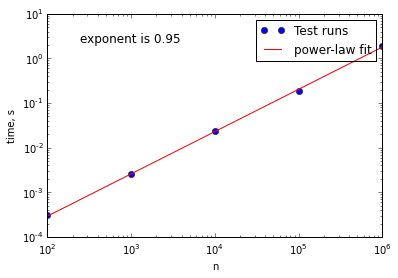

In [22]:
fitline,m = time_experiment.powerfit()

plt.loglog(time_experiment.counts,time_experiment.times,'bo',label='Test runs')
plt.loglog(time_experiment.counts,time_experiment.powerfit()[0],'r-',label='power-law fit')
plt.legend()
plt.figtext(0.2,0.9,"exponent is %.2f"%m, fontsize = 12)

plt.ylabel('time, s')
plt.xlabel('n')
plt.show()

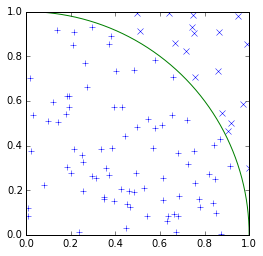

In [23]:
es100 = es.Pi_Estimator(100)
x = es100.tosses[:,0]
y = es100.tosses[:,1]

withincircle = x**2+y**2<1

plt.plot(x[withincircle],y[withincircle],'b+')
plt.plot(x[~withincircle],y[~withincircle],'bx',markerfacecolor='blue')
theta = np.linspace(0,np.pi/2,num=50)
plt.plot(np.cos(theta),np.sin(theta),'g-')
plt.gca().set_aspect('equal')
plt.gca().set_xbound(lower=0,upper=1)
plt.gca().set_ybound(lower=0,upper=1)
plt.show()

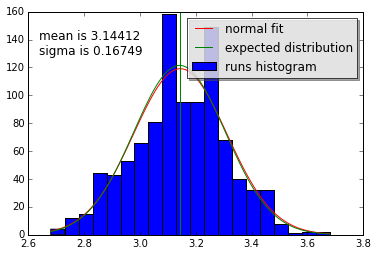

In [20]:
tries=1000
n=100
bin_number=20

ex_hist = ps.Pi_Series(n,runs=tries)
estimates = np.array(e_hist.estims)

n,bins,patches = plt.hist(estimates,bins=bin_number,label='runs histogram')

binwidth = bins[1]-bins[0]
histarea = binwidth*tries

mean = np.mean(estimates)  #
sigma = np.std(estimates)  #
sigma2 = es_hist.sigmas()[0]

def normpdf(x,sigma,mean): #
    return 1./sigma/np.sqrt(2*np.pi)*np.exp(-(x-mean)**2/(2*sigma**2))

x = np.linspace(bins[0],bins[-1],100) 
normal_fit_line = histarea*normpdf(x,sigma,mean)


plt.axvline(mean,color='r')
plt.plot(x,normal_fit_line,color='r',label='normal fit')
plt.axvline(np.pi,color='g')
plt.plot(x,histarea*normpdf(x,sigma2,np.pi),color='g',label='expected distribution')

plt.legend(framealpha=0.7,shadow=True)
plt.figtext(0.15,0.75,"mean is %.5f\nsigma is %.5f"%(mean,sigma), fontsize = 12)

plt.show()

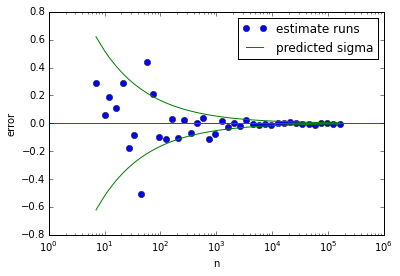

In [25]:
ex_runs = ps.Pi_Series(np.exp(2),np.exp(12),40)

cous=np.array(ex_runs.counts)
ests=np.array(ex_runs.estims)
plt.semilogx(cous, ests-np.pi,'bo',label='estimate runs')
plt.axhline(0,color='g')

sigmas=ex_runs.sigmas()

plt.semilogx(cous, sigmas,color='g',label='predicted sigma')
plt.semilogx(cous,-sigmas,color='g')

plt.ylabel('error')
plt.xlabel('n')

plt.legend()

plt.show()